1. What is the difference between AI, ML, DL, and Data Science? Provide a brief explanation of each.
- AI is the broad goal of creating smart machines; ML is a subset of AI where machines learn from data; DL is a subset of ML using neural networks for complex tasks; and Data Science is an interdisciplinary field that uses these to extract insights from data, with a human in the loop for understanding


2. Explain overfitting and underfitting in ML. How can you detect and prevent them?
- Overfitting is when a model learns training data noise, performing great on training but poorly on new data; underfitting is when a model is too simple, failing to learn patterns, and performs poorly everywhere; detect them by comparing training vs. test performance

3. How would you handle missing values in a dataset? Explain at least three
methods with examples.
- 1.Deletion
  - The simplest approach, removing entire rows or columns with any missing values.
  - Example: If a 'Customer_Age' column has a few missing entries in a large dataset, you might drop those specific customer rows to keep the dataset size manageable and avoid introducing bias through imputation, especially if only a tiny fraction of data is missing.
- 2.Simple Imputation
  - Replacing missing numerical values with the mean or median, and categorical values with the mode.
  - Example: In a 'Product_Price' column  with missing values, replace them with the average price of all existing products. For a 'Product_Category', use the most common category.
- 3.Advanced Imputation/Indicators
  - Forward/Backward Fill: For sequential data, use the last known value  or the next known value.
  - Missing Indicator: Create a new binary column  indicating if the original value was missing, then impute the original column.
  - Example: In a stock price dataset, ffill would fill a missing day's price with the previous day's price. Alternatively, you could add a Price_Missing column and then fill the Price with the median, allowing the model to learn if missingness itself is informative.

4. What is an imbalanced dataset? Describe two techniques to handle it
(theoretical + practical).
- An imbalanced dataset is one where the distribution of classes within the target variable is unequal, meaning some classes have significantly more observations than others.

In [2]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_classes=2, weights=[0.9, 0.1],
                           flip_y=0, random_state=1)

print(f'Original dataset shape %s' % Counter(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f'Resampled dataset shape %s' % Counter(y_train_res))

Original dataset shape Counter({np.int64(0): 900, np.int64(1): 100})
Resampled dataset shape Counter({np.int64(0): 622, np.int64(1): 622})


5. Why is feature scaling important in ML? Compare Min-Max scaling and
Standardization.
- it brings features to a common scale, preventing high-magnitude features from dominating distance/gradient calculations in algorithms like KNN/SVM and speeding up gradient descent, ensuring equal contribution and faster, unbiased training.
- Min-Max Scaling
  - Range: Scales features to a fixed range, typically [0].
  - Pros: Preserves relationships, simple to understand.
  - Cons: Highly sensitive to outliers, as they can compress the range of most data points.
  - Best For: Datasets without significant outliers where a fixed range is desired.
- Standardization
  - Range: Centers data around zero with unit standard deviation; no fixed range.
  - Pros: More robust to outliers; good for algorithms assuming normal distribution (like PCA).
  - Cons: Doesn't bound values; less intuitive.
  - Best For: Algorithms sensitive to feature distribution (PCA, linear models) or when outliers are present.

6. Compare Label Encoding and One-Hot Encoding. When would you prefer
one over the other?
- Label Encoding
  - Output Format: Single numerical column.
  - Data Type Suitability: Ordinal (ordered) data.
  - Assumed Relationship: Introduces a numerical order/ranking among categories.
  - Data Sparsity: Data Sparsity.
- One-Hot Encoding
  - Output Format: Multiple binary columns (one for each category).
  - Data Type Suitability: Nominal (unordered) data.
  - Assumed Relationship: Assumes no order or hierarchy between categories.
  - Data Sparsity: Creates sparse data.

         

In [4]:
#7.Google Play Store Dataset
#a). Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?
#Dataset: https://github.com/MasteriNeuron/datasets.git

!wget -q https://raw.githubusercontent.com/MasteriNeuron/datasets/main/googleplaystore.csv

import pandas as pd
df = pd.read_csv("googleplaystore.csv")
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df_clean = df.dropna(subset=["Category", "Rating"])
avg_category_rating = (
    df_clean
    .groupby("Category")["Rating"]
    .mean()
    .sort_values(ascending=False)
)

print("Average Rating by Category:\n")
print(avg_category_rating)

print("\nTop 5 Highest Rated Categories:\n")
print(avg_category_rating.head(5))

print("\nBottom 5 Lowest Rated Categories:\n")
print(avg_category_rating.tail(5))

Average Rating by Category:

Category
1.9                    19.000000
EVENTS                  4.435556
EDUCATION               4.389032
ART_AND_DESIGN          4.358065
BOOKS_AND_REFERENCE     4.346067
PERSONALIZATION         4.335987
PARENTING               4.300000
GAME                    4.286326
BEAUTY                  4.278571
HEALTH_AND_FITNESS      4.277104
SHOPPING                4.259664
SOCIAL                  4.255598
WEATHER                 4.244000
SPORTS                  4.223511
PRODUCTIVITY            4.211396
HOUSE_AND_HOME          4.197368
FAMILY                  4.192272
PHOTOGRAPHY             4.192114
AUTO_AND_VEHICLES       4.190411
MEDICAL                 4.189143
LIBRARIES_AND_DEMO      4.178462
FOOD_AND_DRINK          4.166972
COMMUNICATION           4.158537
COMICS                  4.155172
NEWS_AND_MAGAZINES      4.132189
FINANCE                 4.131889
ENTERTAINMENT           4.126174
BUSINESS                4.121452
TRAVEL_AND_LOCAL        4.109292
LIFES

In [14]:
#8.Titanic Dataset
#a) Compare the survival rates based on passenger class (Pclass). Which class had the highest survival rate, and why do you think that happened?
#b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and adults (Age ≥ 18). Did children have a better chance of survival?
#Dataset: https://github.com/MasteriNeuron/datasets.git

!wget -q https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv

import pandas as pd
df = pd.read_csv("titanic.csv")
pclass_survival = df.groupby("Pclass")["Survived"].mean()

print("Survival Rate by Passenger Class:\n")
print(pclass_survival)

Survival Rate by Passenger Class:

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [18]:
!wget -q https://raw.githubusercontent.com/MasteriNeuron/datasets/main/titanic.csv

df_age = df.dropna(subset=["Age"])
df_age["AgeGroup"] = df_age["Age"].apply(
    lambda x: "Child" if x < 18 else "Adult"
)
age_survival = df_age.groupby("AgeGroup")["Survived"].mean()

print("Survival Rate by Age Group:\n")
print(age_survival)

Survival Rate by Age Group:

AgeGroup
Adult    0.381032
Child    0.539823
Name: Survived, dtype: float64


/tmp/ipython-input-2272776643.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["AgeGroup"] = df_age["Age"].apply(


In [20]:
#9.Flight Price Prediction Dataset
#a) How do flight prices vary with the days left until departure? Identify any exponential price surges and recommend the best booking window.
#b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are consistently cheaper/premium, and why?
#Dataset: https://github.com/MasteriNeuron/datasets.git

#How do flight prices vary with days left until departure?

!wget -q https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv

import pandas as pd
df = pd.read_csv("flight_price.csv")
price_by_days = (
    df.groupby("days_left")["price"]
    .mean()
    .sort_index()
)

print("Average Flight Price by Days Left:\n")
print(price_by_days.head(10))
print("\n...\n")
print(price_by_days.tail(10))

Average Flight Price by Days Left:

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
Name: price, dtype: float64

...

days_left
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64


In [21]:
#Airline Price Comparison for Delhi → Mumbai Route

!wget -q https://raw.githubusercontent.com/MasteriNeuron/datasets/main/flight_price.csv

delhi_mumbai = df[
    (df["source_city"] == "Delhi") &
    (df["destination_city"] == "Mumbai")
]
airline_prices = (
    delhi_mumbai.groupby("airline")["price"]
    .mean()
    .sort_values()
)

print("Average Airline Prices (Delhi–Mumbai Route):\n")
print(airline_prices)


Average Airline Prices (Delhi–Mumbai Route):

airline
AirAsia       3981.191456
Indigo        4473.739130
SpiceJet      4628.251984
GO_FIRST      5762.211515
Air_India    23695.916916
Vistara      26630.293322
Name: price, dtype: float64


Correlation with Attrition:

AttritionFlag           1.000000
average_montly_hours    0.071287
salary_numeric         -0.157898
satisfaction_level     -0.388375
Name: AttritionFlag, dtype: float64


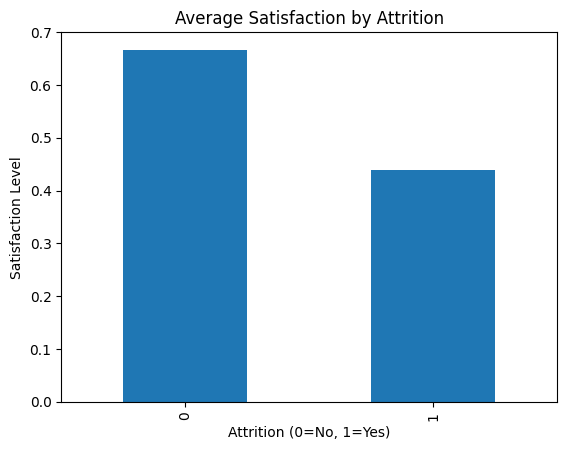

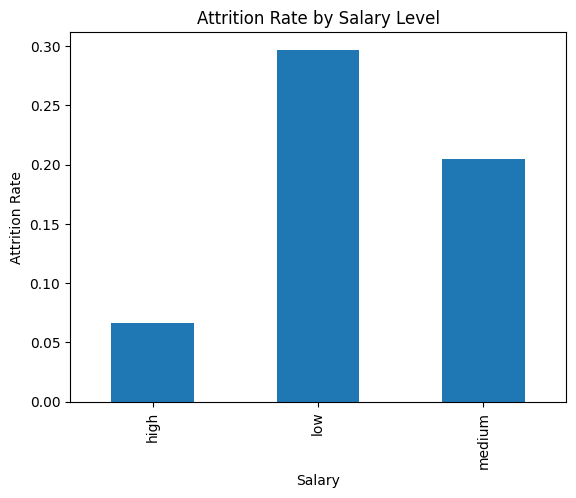

In [33]:
#10. HR Analytics Dataset
#a). What factors most strongly correlate with employee attrition? Use visualizations to show key drivers (e.g., satisfaction, overtime, salary).
#b). Are employees with more projects more likely to leave?
# Dataset: hr_analytics

# Download the dataset
!wget -q https://raw.githubusercontent.com/MasteriNeuron/datasets/main/hr_analytics.csv

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("hr_analytics.csv")
df["AttritionFlag"] = df["left"]
salary_mapping = {"low": 0, "medium": 1, "high": 2}
df["salary_numeric"] = df["salary"].map(salary_mapping)
features = ["satisfaction_level", "average_montly_hours",
            "salary_numeric", "AttritionFlag"]
correlation = df[features].corr()["AttritionFlag"].sort_values(ascending=False)
print("Correlation with Attrition:\n")
print(correlation)

df.groupby("AttritionFlag")["satisfaction_level"].mean().plot(kind="bar")
plt.title("Average Satisfaction by Attrition")
plt.xlabel("Attrition (0=No, 1=Yes)")
plt.ylabel("Satisfaction Level")
plt.show()

df.groupby("salary")["AttritionFlag"].mean().plot(kind="bar")
plt.title("Attrition Rate by Salary Level")
plt.xlabel("Salary")
plt.ylabel("Attrition Rate")
plt.show()

